Credit Score Classification

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
import ast
import numpy as np

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 200)

Importing data and storing in a dataframe

In [3]:
data = pd.read_csv('credit-score-classification-cleaned-dataset/credit_score_cleaned_train.csv')
data.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,7,11.270,4,Good,809.980,26.823,265,No,80.415,High_spent_Small_value_payments,312.494,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",-1,7,11.270,4,Good,809.980,31.945,266,No,118.280,Low_spent_Large_value_payments,284.629,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,7,11.270,4,Good,809.980,28.609,267,No,81.700,Low_spent_Medium_value_payments,331.210,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",5,4,6.270,4,Good,809.980,31.378,268,No,199.458,Low_spent_Small_value_payments,223.451,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",6,4,11.270,4,Good,809.980,24.797,269,No,41.420,High_spent_Medium_value_payments,341.489,2


Exploratory Data Analysis

Looking at the attribute types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

Checking for null values

In [5]:
nullCounts = data.isnull().sum()
print(nullCounts)

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
total_emi_per_month         0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64


Checking for duplicates

In [6]:
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


Looking at the mean and standard deviations

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.000,33.309,10.765,14.000,24.000,33.000,42.000,56.000
annual_income,100000.000,50505.123,38299.422,7005.930,19342.972,36999.705,71683.470,179987.280
monthly_inhand_salary,100000.000,4198.772,3187.494,303.645,1626.762,3096.378,5961.745,15204.634
total_emi_per_month,100000.000,107.044,130.035,0.000,29.197,66.403,146.827,3776.000
num_bank_accounts,100000.000,5.369,2.593,0.000,3.000,5.000,7.000,11.000
num_credit_card,100000.000,5.534,2.067,0.000,4.000,5.000,7.000,11.000
interest_rate,100000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
num_of_loan,100000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
num_of_delayed_payment,100000.000,13.334,6.271,0.000,9.000,14.000,18.000,28.000


In [8]:
data.describe(include="object").T

,count,unique,top,freq
id,100000,100000,0x1602,1
customer_id,100000,12500,CUS_0xd40,8
month,100000,8,January,12500
name,100000,10139,Langep,48
ssn,100000,12500,821-00-0265,8
occupation,100000,15,Lawyer,7096
type_of_loan,100000,6261,['No Loan'],11408
credit_mix,100000,3,Standard,45848
payment_of_min_amount,100000,2,Yes,59432
payment_behaviour,100000,6,Low_spent_Small_value_payments,27588


Converting type_of_loan entries from string to list of strings to make it usable

In [9]:
data['type_of_loan'] = data['type_of_loan'].apply(ast.literal_eval)

In [10]:
data.describe(include="object").T

,count,unique,top,freq
id,100000,100000,0x1602,1
customer_id,100000,12500,CUS_0xd40,8
month,100000,8,January,12500
name,100000,10139,Langep,48
ssn,100000,12500,821-00-0265,8
occupation,100000,15,Lawyer,7096
type_of_loan,100000,6261,[No Loan],11408
credit_mix,100000,3,Standard,45848
payment_of_min_amount,100000,2,Yes,59432
payment_behaviour,100000,6,Low_spent_Small_value_payments,27588


Getting count of the different types of loan in each credit score

In [11]:
loanCountsByCreditScore = {0: {}, 1: {}, 2: {}}

for idx, row in data.iterrows():
    loanList = row['type_of_loan']
    creditScore = row['credit_score']

    for loan in loanList:
        loan = loan.strip()
        if loan not in loanCountsByCreditScore[creditScore]:
            loanCountsByCreditScore[creditScore][loan] = 1
        else:
            loanCountsByCreditScore[creditScore][loan] += 1

In [12]:
flattenedData = []

for creditScore, loans in loanCountsByCreditScore.items():
    for loan, count in loans.items():
        flattenedData.append({
            'credit_score': creditScore,
            'loan_type': loan,
            'loan_count': count
        })

loanData = pd.DataFrame(flattenedData)

print(loanData)

    credit_score                loan_type  loan_count
0              0            Not Specified       15346
1              0                Auto Loan       14970
2              0             Student Loan       15392
3              0            Personal Loan       15003
4              0              Payday Loan       15920
5              0         Home Equity Loan       15154
6              0                  No Loan        1336
7              0            Mortgage Loan       15213
8              0  Debt Consolidation Loan       15244
9              0      Credit-Builder Loan       15665
10             1                Auto Loan       18933
11             1      Credit-Builder Loan       20232
12             1            Personal Loan       19720
13             1         Home Equity Loan       19602
14             1            Not Specified       19656
15             1                  No Loan        6628
16             1            Mortgage Loan       19358
17             1            

Dropping id, name and ssn columns

In [13]:
columnsToDrop = ['id', 'name', 'ssn']
data = data.drop(columns=columnsToDrop)

Looking at the unique credit score values

In [14]:
uniqueScores = data['credit_score'].unique()
print("Unique credit scores in the dataset:", sorted(uniqueScores))

Unique credit scores in the dataset: [0, 1, 2]


There are three possible credit scores classes. 0 which referes to Poor, 1 which referes to Standard and 2 which refers to Good.

Evaluating distribution of Credit Scores

In [15]:
scoreCounts = data['credit_score'].value_counts()
scorePercentages = data['credit_score'].value_counts(normalize=True) * 100
scoreSummary = pd.DataFrame({
    'Count': scoreCounts,
    'Percentage (%)': scorePercentages
})

print("Credit score counts and percentages:\n", scoreSummary.sort_index())

Credit score counts and percentages:
    Count  Percentage (%)
0  28998          28.998
1  53174          53.174
2  17828          17.828


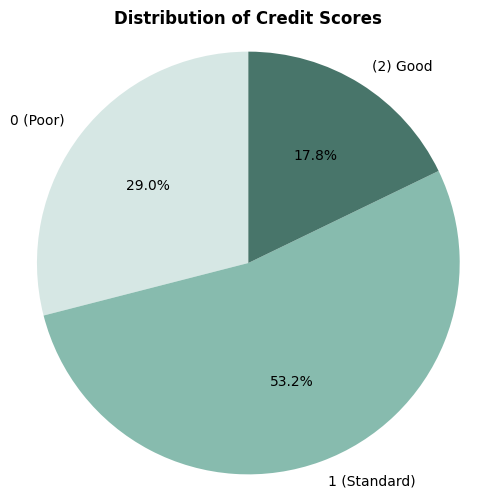

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(scoreCounts.sort_index(), labels=['0 (Poor)', '1 (Standard)', '(2) Good'], autopct='%1.1f%%', startangle=90, colors=['#d6e7e4', '#87bbae', '#48756a'])
plt.title("Distribution of Credit Scores", fontsize=12, fontweight="bold")
plt.axis('equal')
plt.show()

Data is slightly unbalances with the majority class being Standard (1) with 53.2%, followed by Poor (0) with 29.0% and then Good (2) with 17.8%.

Count of unique customers

In [17]:
uniqueCustomers = data['customer_id'].nunique()
print(f"Number of unique customer IDs: {uniqueCustomers}")

Number of unique customer IDs: 12500


The dataset contains data on 12500 customers.

Looking at the unique month values

In [18]:
uniqueMonths = data['month'].unique()
print("Unique months in the dataset:", uniqueMonths)

Unique months in the dataset: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


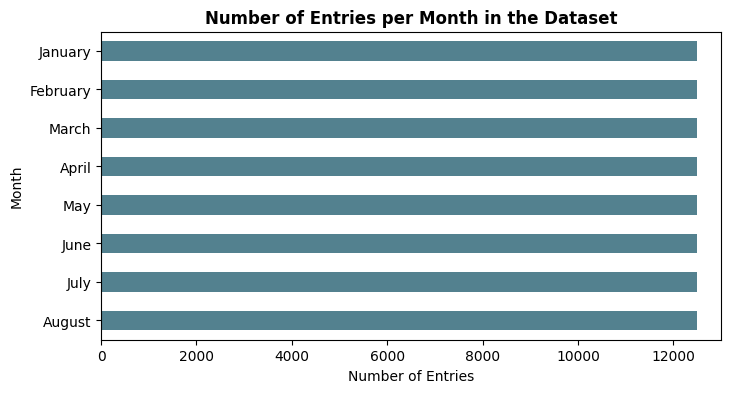

In [19]:
monthCounts = data['month'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(
    x=monthCounts.values, 
    y=monthCounts.index, 
    color='#498699',
    width=0.5)

plt.xlim(0, 13000)
plt.xlabel("Number of Entries")
plt.ylabel("Month")
plt.title("Number of Entries per Month in the Dataset", fontsize=12, fontweight="bold")
# sns.despine(left=True)
plt.show()

We have data for each customer over 8 months from January to August.

<Figure size 1000x600 with 0 Axes>

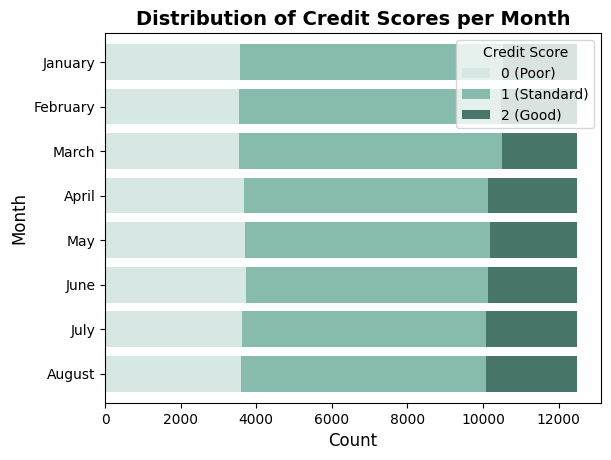

In [20]:
monthOrder = ['August', 'July', 'June', 'May', 'April', 'March', 'February', 'January']
data['orderedMonth'] = pd.Categorical(data['month'], categories=monthOrder)

monthScoreDistribution = data.groupby(['orderedMonth', 'credit_score']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
monthScoreDistribution.plot(kind='barh', stacked=True, width=0.8, color=['#d6e7e4', '#87bbae', '#48756a'])

plt.title("Distribution of Credit Scores per Month", fontsize=14, fontweight="bold")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Month", fontsize=12)

plt.legend(labels=["0 (Poor)", "1 (Standard)", "2 (Good)"], title="Credit Score", loc="upper right")
# sns.despine(left=True)
plt.show()

The distribution of credit scores is similar for every month. Standard has the highest percentage of credit scores across every month followed by Poor and then Good.

Checking if the customer credit score remains same or varies across the 8 months (January-August)

In [21]:
creditScoreVariability = data.groupby('customer_id')['credit_score'].nunique()
varyingCreditScores = creditScoreVariability[creditScoreVariability > 1]

print(f"Number of customers with varying credit scores: {len(varyingCreditScores)}")

Number of customers with varying credit scores: 7292


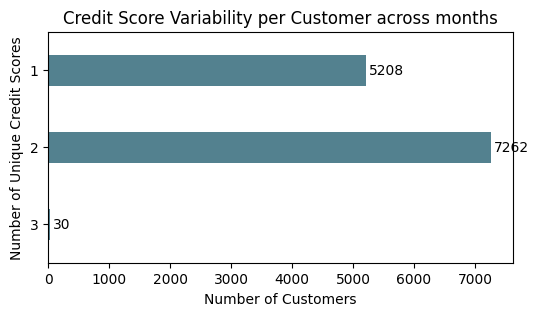

In [22]:
variabilityCounts = creditScoreVariability.value_counts().sort_index()

plt.figure(figsize=(6, 3))

sns.barplot(
    x=variabilityCounts.values,    
    y=variabilityCounts.index.astype(str),          
    color='#498699',
    width=0.4
)

for index, value in enumerate(variabilityCounts.values):
    plt.text(value + 50, index, str(value), va='center', ha='left', fontsize=10)
    
plt.title("Credit Score Variability per Customer across months", fontsize=12)
plt.ylabel("Number of Unique Credit Scores", fontsize=10)
plt.xlabel("Number of Customers", fontsize=10)

# sns.despine(left=True)
plt.show()

5208 customers maintain same credit score across the 8 months whereas 7262 customers go from one score to another and 30 customers change across all three credit scores.

Univariate Analysis of Numerical Variables

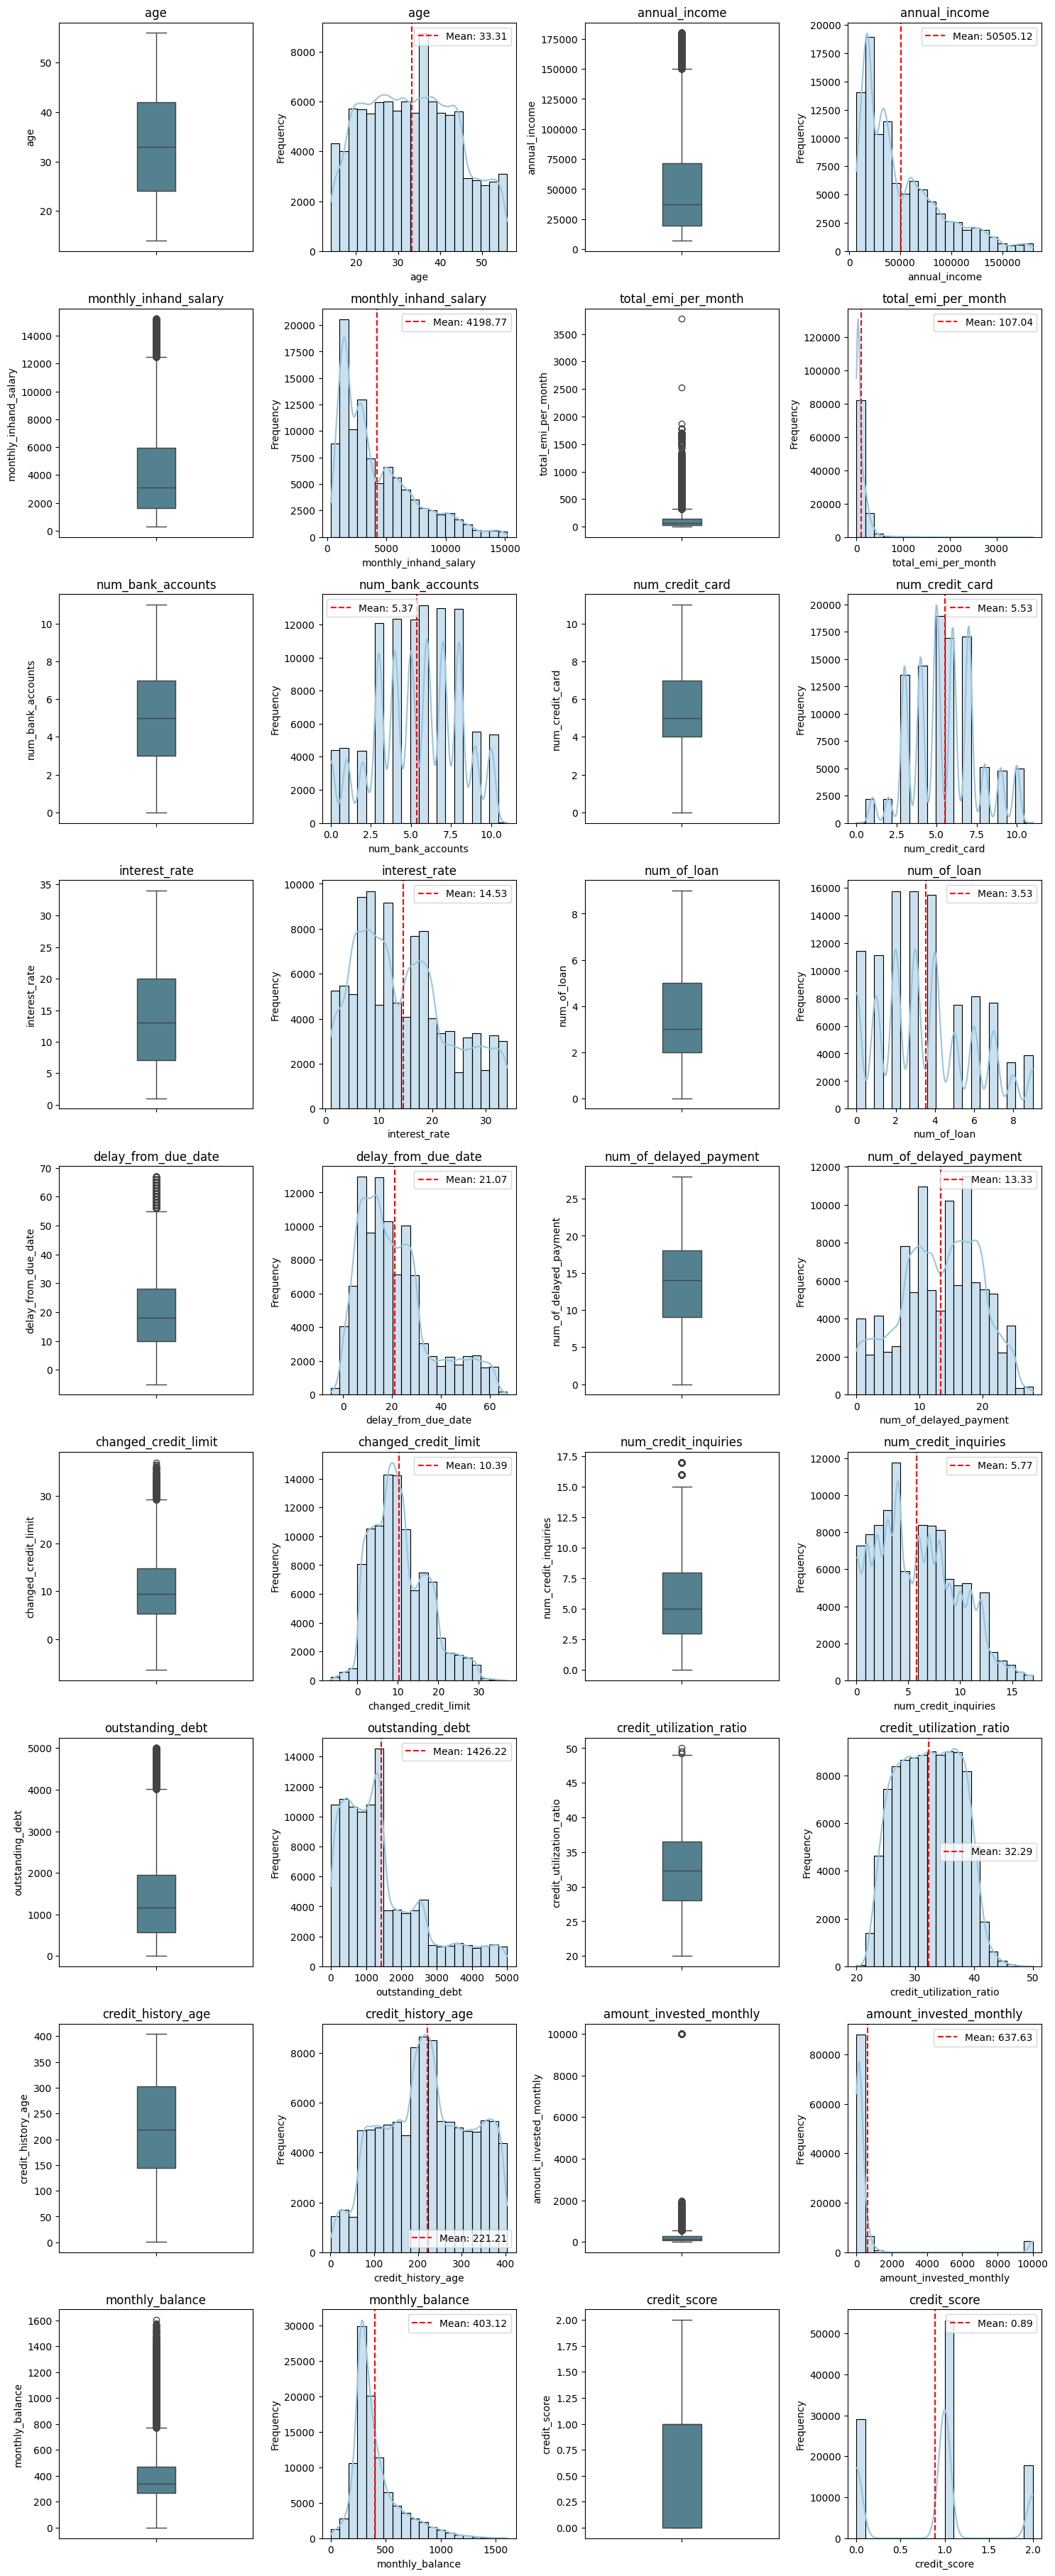

In [23]:
numericColumns = data.select_dtypes(include='number').columns

numPlots = len(numericColumns)
rows = (numPlots // 2) + 1
cols = 4  

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()


for i, col in enumerate(numericColumns):
  
    sns.boxplot(data=data, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(f'{col}', fontsize=12)
    # axes[2 * i].set_xlabel(col, fontsize=10)
    axes[2 * i].set_ylabel(col, fontsize=10)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=20)
    mean_value = data[col].mean()
    axes[2 * i + 1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[2 * i + 1].legend()

    axes[2 * i + 1].set_title(f'{col}', fontsize=12)
    axes[2 * i + 1].set_xlabel(col, fontsize=10)
    axes[2 * i + 1].set_ylabel('Frequency', fontsize=10)


for j in range(2 * numPlots, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.tight_layout()
plt.show()

Variables such as age, num_bank_accounts, num_credit_card, num_of_delayed_payments, changed_credit_limit, credit_utlization_ratio and credit_history_age are somewhat normally distributed with their means close to the centre. Interest_rate, num_of_loans, delay_from_due_date, num_credit_inquiries are slightly right-skewed. Variables annual_income, monthly_inhand_salary, total_emi_per_month, outstanding_debt, amount_invested_monthly and monthly_balance are heavily right skewed.

Univariate Analysis of Categorical Variables


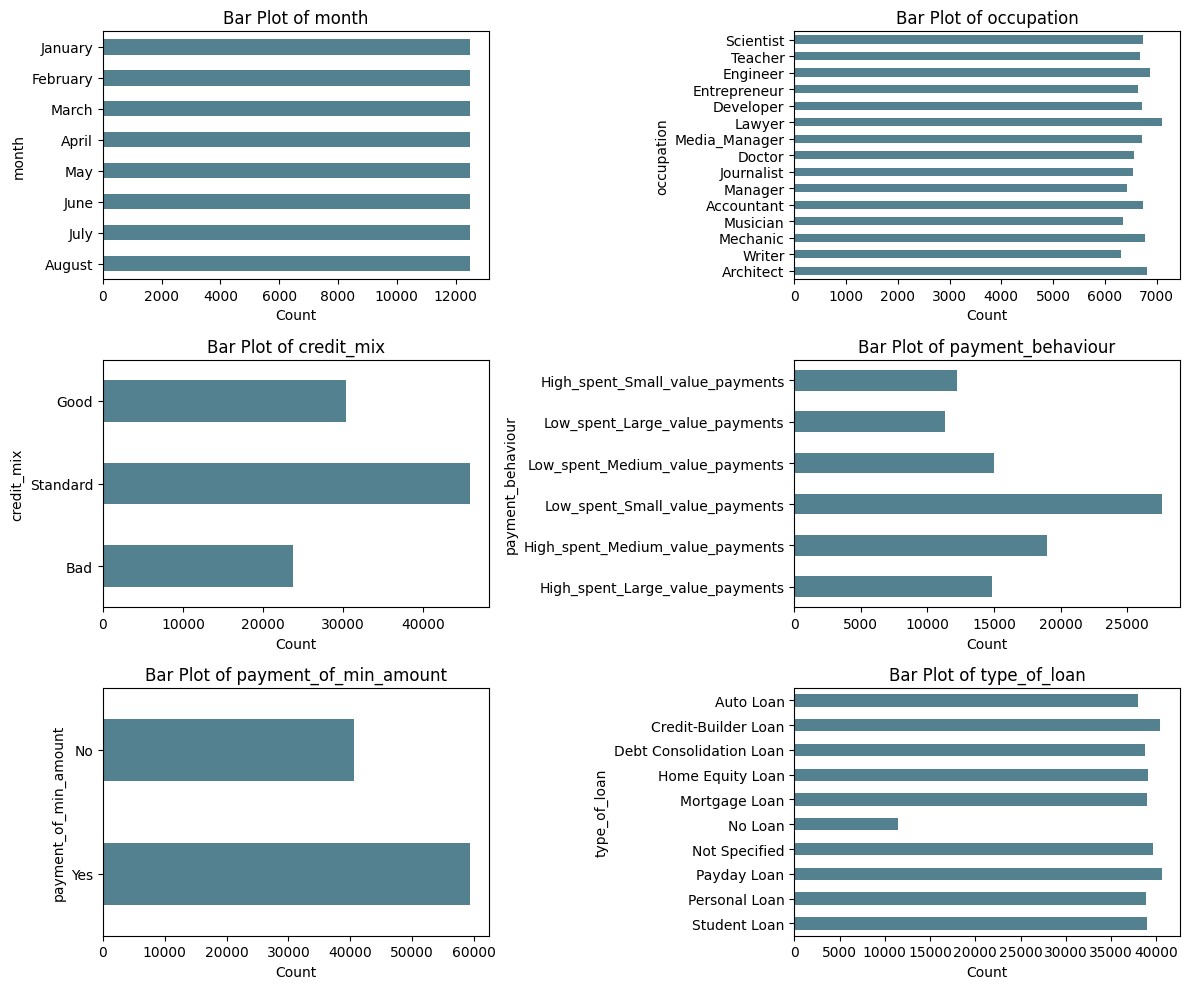

In [24]:
categoricalColumns = ['month', 'occupation', 'credit_mix', 'payment_behaviour', 'payment_of_min_amount']

dataFiltered = data[categoricalColumns]

numPlots = len(categoricalColumns)
rows = (numPlots // 2) + 1
cols = 2  

fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categoricalColumns):
    sns.countplot(data=dataFiltered, y=col, ax=axes[i], color='#498699', width=0.5, legend=False, orient='h')
    axes[i].set_title(f'Bar Plot of {col}', fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].set_xlabel('Count', fontsize=10)

loanTypeCounts = loanData.groupby('loan_type')['loan_count'].sum().reset_index()

sns.barplot(x='loan_count', y='loan_type', data=loanTypeCounts, ax=axes[numPlots], color='#498699', width=0.5)
axes[numPlots].set_title('Bar Plot of type_of_loan', fontsize=12)
axes[numPlots].set_xlabel('Count', fontsize=10)
axes[numPlots].set_ylabel('type_of_loan', fontsize=10)

for j in range(numPlots+1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.tight_layout()
plt.show()

There is an almsot even distribution in occupation and type_of_loan (except for no loan). In credit_mix, standard has the highest count whereas in payment_behaviour, low_spent_small_value_payments has the highest count. In payment_of_min_amount, Yes is the majority class which means that most of the people paid just the minimum amount required every month.

Comparing relationship between numerical columns and credit scores

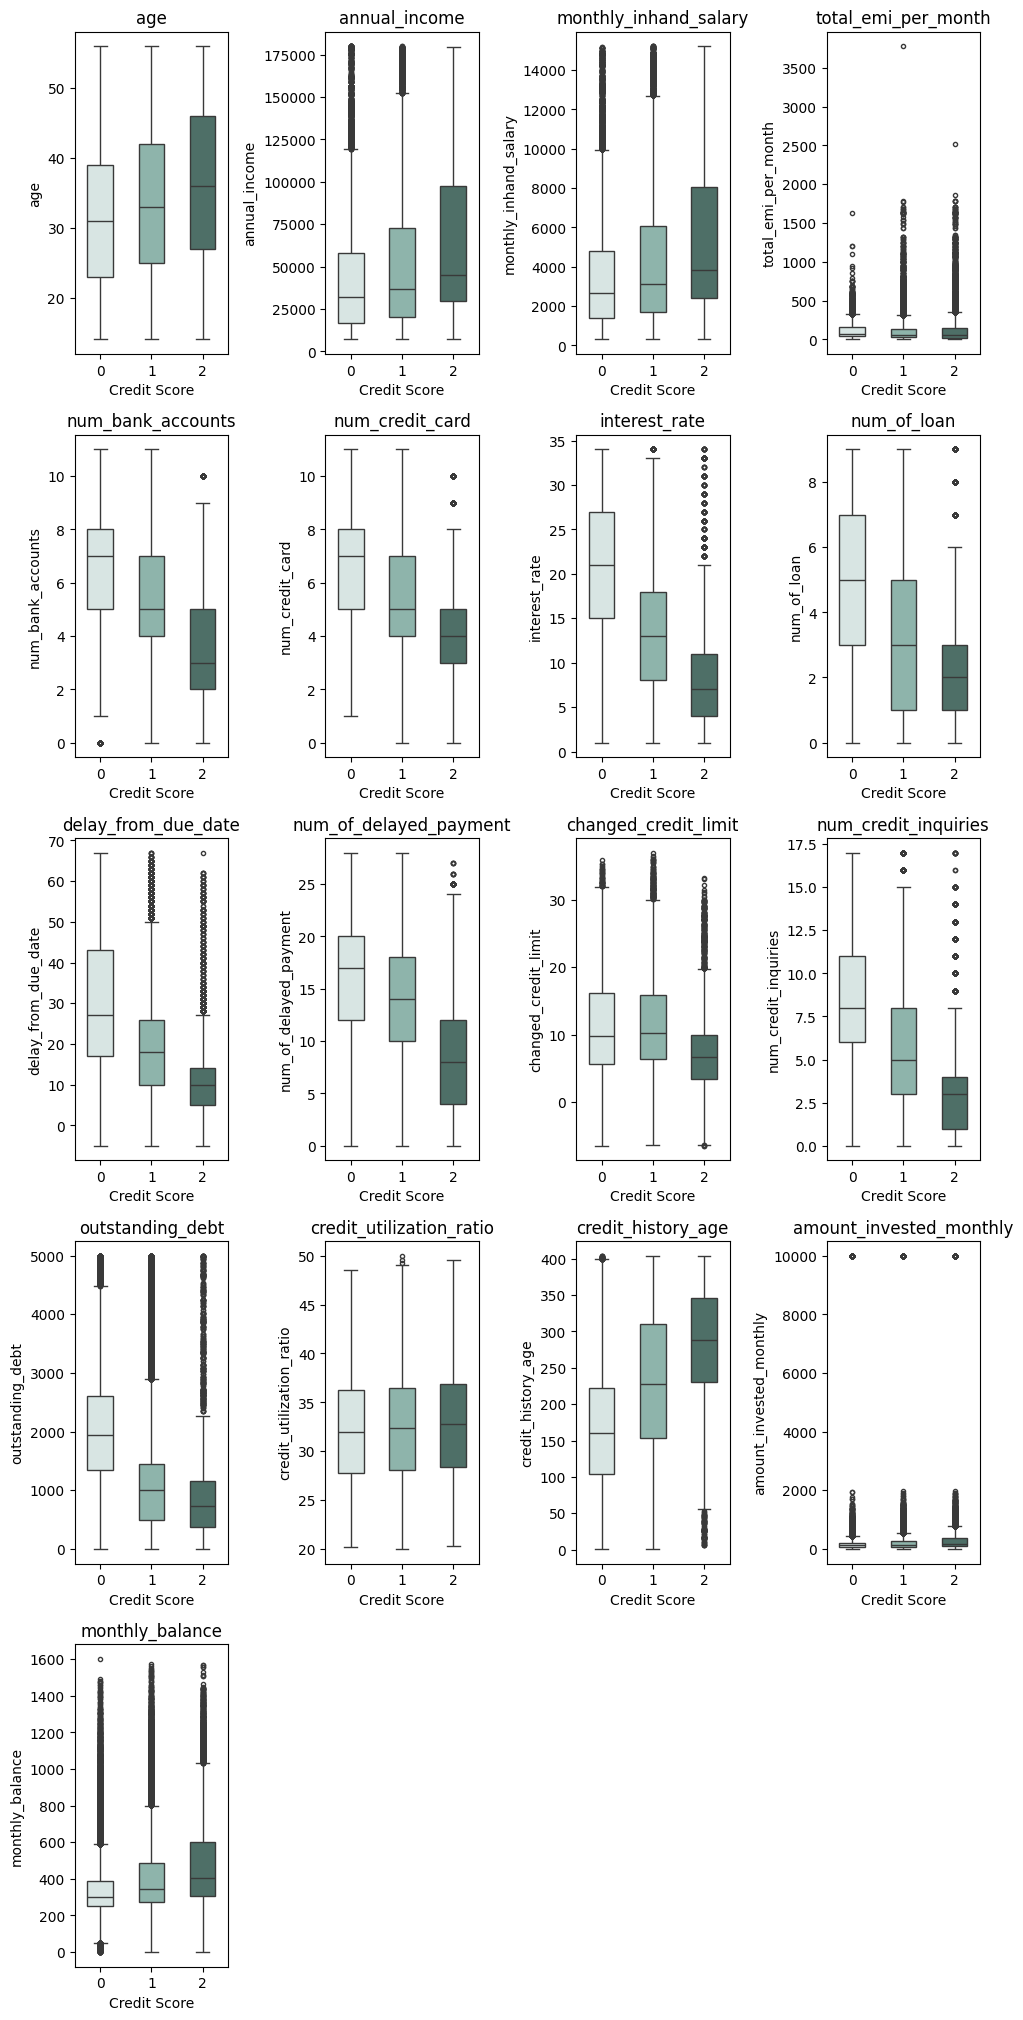

In [25]:
numericColumns = data.select_dtypes(include='number').columns.drop('credit_score')
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}
flierprops = dict(markersize=3)

numPlots = len(numericColumns)
nCols = 4
nRows = (numPlots // 2) + 1

fig, axes = plt.subplots(nRows, nCols, figsize=(10, nRows * 4))
axes=axes.flatten()

for i, col in enumerate(numericColumns):
    sns.boxplot(data=data, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, width=0.5, legend=False, flierprops=flierprops)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

for j in range(numPlots, len(axes)):
    axes[j].set_visible(False)

plt.subplots_adjust(hspace=0.4, wspace=5)
plt.tight_layout()
plt.show()

The mean values of age, annual_income, monthly_in_hand salary, credit_history_age and monthly_balance increases as the credit score increase. Whereas the mean values of num_bank_accounts, num_credit_card, interest_rate, num_of_loan, delay_from_due_date (in days), num_of_delayed_payments, num_credi_inquiries, outstanding_debt decreases as the crdit score increase. For changed_credit_limit and credit_utilization_ratio the mean values relatively stay the same across the credi scores. It is difficult to determine the realtionship for total_emi_per_month and amount_invested_monthly due to outliers.

Further analysis on total_emi_per_month and amount_invested_monthly (removing outliers)

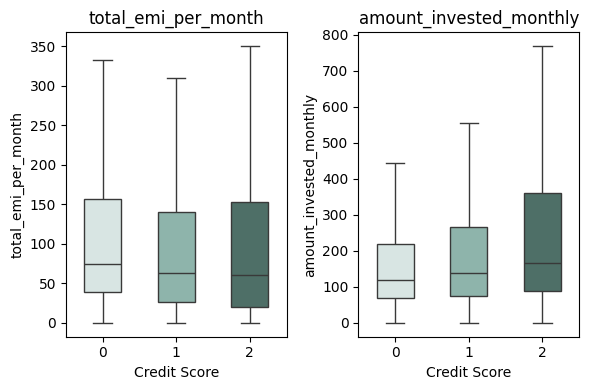

In [26]:
columnsToPlot = ['total_emi_per_month', 'amount_invested_monthly']
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}

fig, axes = plt.subplots(1, 2, figsize=(6, 4))
axes = axes.flatten()

for i, col in enumerate(columnsToPlot):
    sns.boxplot(data=data, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, showfliers=False, width=0.5, legend=False)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

plt.subplots_adjust(hspace=0.4, wspace=20)
plt.tight_layout()
plt.show()

For total_emi_per_month, the mean value slightly decreases as the credit score increase whereas for amount_invested_monthly, the mean values slightly increase as the credit score increases. However, for both of them the variation is very minimal.

Comparing distribution of numerical columns in each credit score

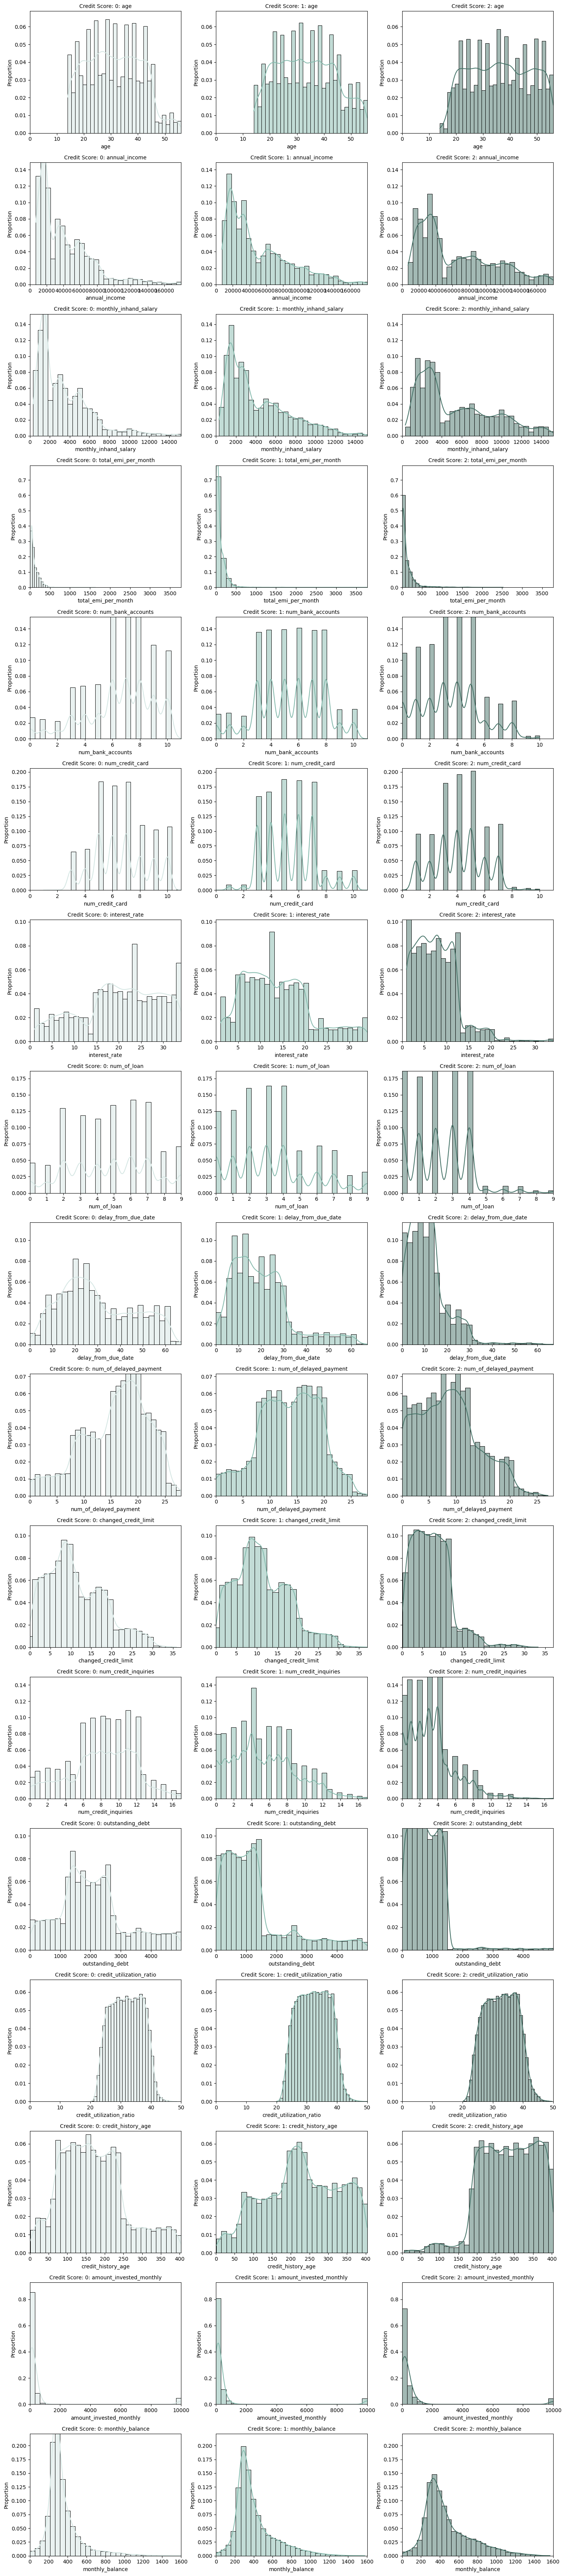

In [27]:
creditScores = {0: "Credit Score: 0", 1: "Credit Score: 1", 2: "Credit Score: 2"}

globalXLimits = {}
globalYLimits = {}

for i, col in enumerate(numericColumns):
    xMax = data[col].max()
    yMax = 0
    yMaxPercent = 0
    _, bins, _ = plt.hist(data[col], bins=30)
    plt.close()
    
    for score in creditScores.keys():
        counts = [0] * (len(bins) - 1)
        for i in range(len(bins) - 1):
            counts[i] = sum(
                (data[data['credit_score'] == score][col] >= bins[i]) &
                (data[data['credit_score'] == score][col] < bins[i + 1])
            )
        if yMax < max(counts):
            yMax = max(counts)
            yMaxPercent = yMax/sum(counts)

        # yMax = max(yMax, max(counts))

    buffer = yMaxPercent*0.1
    globalXLimits[col] = (0, xMax)
    globalYLimits[col] = (0, yMaxPercent+buffer)


nCols = 3 
nRows = len(numericColumns)
fig, axes = plt.subplots(nRows, nCols, figsize=(15, nRows * 4))
axes = axes.reshape(nRows, nCols)

for i, col in enumerate(numericColumns):
    for j, score in enumerate(creditScores.keys()):
        sns.histplot(
            data=data[data['credit_score'] == score],
            x=col,
            kde=True,
            stat="probability",
            color={0: '#d6e7e4', 1: '#87bbae', 2: '#48756a'}[score],
            ax=axes[i, j],
            bins=30
        )
        axes[i, j].set_title(f'{creditScores[score]}: {col}', fontsize=10)
        axes[i, j].set_ylabel('Proportion')
        axes[i, j].set_xlabel(col)

        axes[i, j].set_xlim(globalXLimits[col])
        axes[i, j].set_ylim(globalYLimits[col])

plt.tight_layout()
plt.show()

Out of all the customers with a good credit score, there is a higher proportion of customers above the age of 45 as compared to the customers with a poor and standard credit score. Moreover, a greater proportion of customers with a good credit have fewer bank accounts as compared to the ones with a poor and standard score. A greater proportion of customers with a good credit score have a lower interest rate as compared to the ones with a poor and standard score but this may be because they are eligible for lower interest rates. A large proportion of good credit score customers also take fewer loans. They also have shorter delays from the due date and lesser delayed payments as well. Moreover, almost all of the customers with a good credit score have either no outstanding debt or debt less than 1500 whereas customers with a standard or poor credit score do have higher outstanding debts. Credit utilization rate is similar across the credit scores. However, a greater proportion of customers with a good credit score have a longer credit history age as compared to the other customers.

Comparing relationship between categorical columns and credit scores

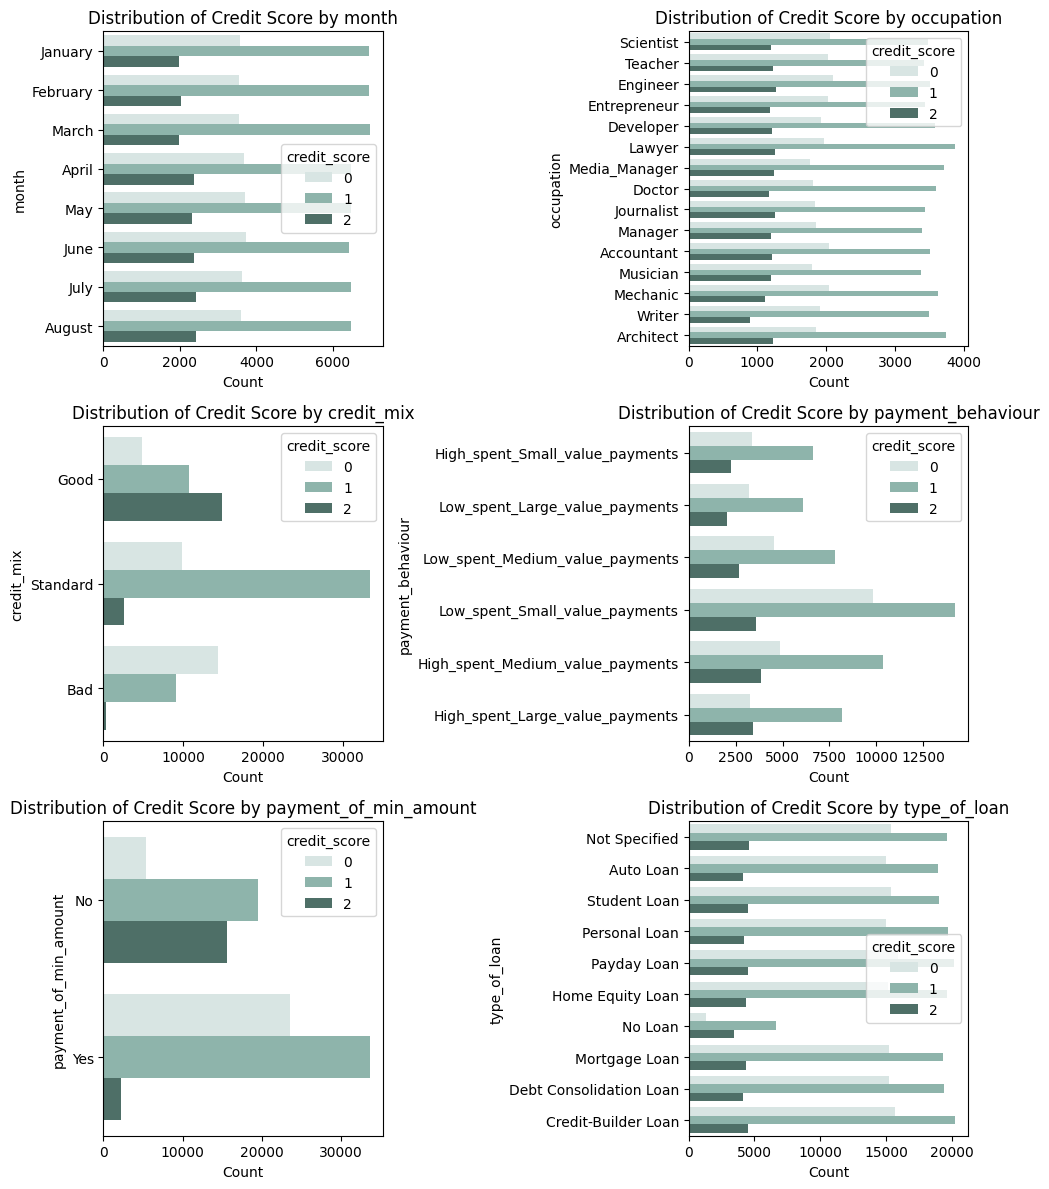

In [28]:
categoricalColumns = ['month', 'occupation', 'credit_mix', 'payment_behaviour', 'payment_of_min_amount']
dataFiltered = data[categoricalColumns]
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}

numPlots = len(categoricalColumns)
nCols = 2
nRows = (numPlots + 1) // nCols

fig, axes = plt.subplots(nRows, nCols, figsize=(10, nRows * 4))
axes = axes.flatten()

for i, col in enumerate(categoricalColumns):
    sns.countplot(data=data, y=col, hue='credit_score', ax=axes[i], palette=customPalette)
    axes[i].set_title(f'Distribution of Credit Score by {col}', fontsize=12)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Count')

sns.barplot(data=loanData, y='loan_type', x='loan_count', hue='credit_score', ax=axes[numPlots], palette=customPalette)
axes[numPlots].set_title('Distribution of Credit Score by type_of_loan', fontsize=12)
axes[numPlots].set_ylabel('type_of_loan')
axes[numPlots].set_xlabel('Count')

for j in range(numPlots+1, len(axes)):
    axes[j].set_visible(False)


plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()



Distribution of credit score across month, occupation, payment_behaviour and type_of_loan is similar in which 1 (standard) is the majority in every class followed by 0 (poor) and then 2 (good). However in the No Loan class in type_of_loan, 2 (standard) is much higher than 0 (poor). In credit_mix, the majority class relates to the credit score. In Good credit mix, the majority class is 2 (good), in Standard credit mix, the majority class is 1 (standard) whereas in Bad credit mix, the majority class is 0 (poor). In payment_of_min_amount, customers who did not pay just the minimum amount have a majority of 1 (standard) credit scores, closely followed by 2 (good) credit scores and a few 0 (poor) credit scores. However, those who paid just the minimum amount, also have a majority of 1 (standard) credit scores but followed by 0 (poor) credit scores and with a very few 2 (good) credit scores.

Checking the distribution of credit_mix within each credit score

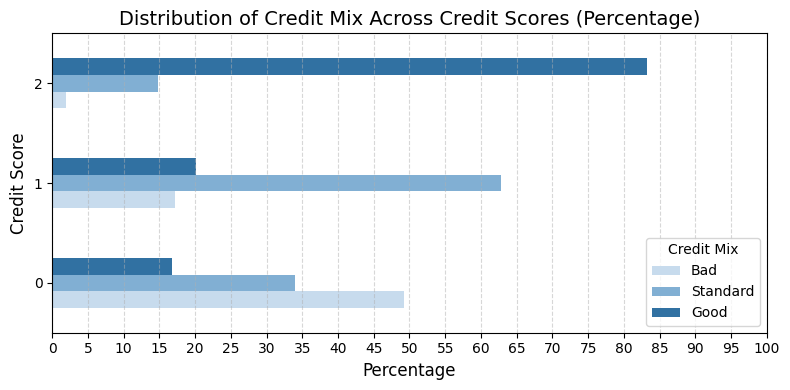

In [29]:
creditMixDistribution = data.groupby(['credit_score', 'credit_mix']).size().unstack(fill_value=0)

creditMixSums = creditMixDistribution.sum(axis=1)   # calculating sum of each row. getting total count of each credit score
creditMixDistributionNormalized = creditMixDistribution.div(creditMixSums, axis=0)   # dviding each entry by total count of respective credit score
creditMixDistributionPercent = creditMixDistributionNormalized * 100

creditMixDistributionPercent = creditMixDistributionPercent[['Bad', 'Standard', 'Good']]    # for ordering

creditMixDistributionPercent.plot(kind='barh', figsize=(8, 4), color=['#c7dbed', '#81afd3', '#3171a2'])
plt.title('Distribution of Credit Mix Across Credit Scores (Percentage)', fontsize=14)
plt.ylabel('Credit Score', fontsize=12)
plt.xlabel('Percentage', fontsize=12)
plt.legend(title='Credit Mix', fontsize=10)
plt.xticks(range(0, 101, 5), rotation=0)
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

The figure shows that around 50% of the customers who have a 0 (poor) credit score have a bad credit mix. More than 60% of the customers who have a standard credit mix have a 1 (standard) credit score. Lastly more than 80% of the customers who have a 2 (good) score have a good credit mix as well.

Checking distribution of payment_of_min_amount across within each credit score

payment_of_min_amount     No    Yes
credit_score                       
0                       5439  23559
1                      19509  33665
2                      15620   2208


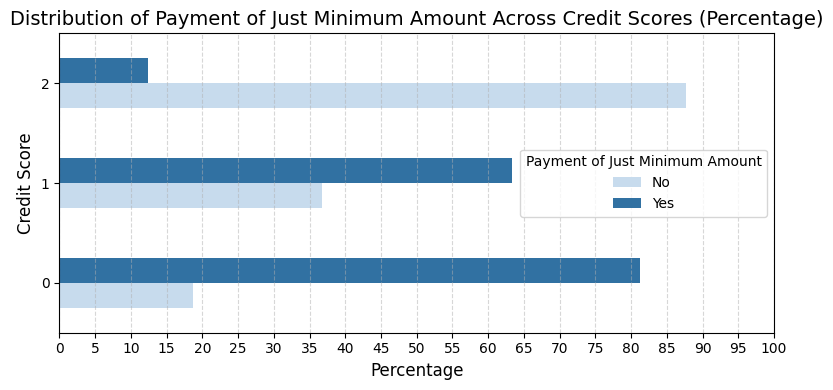

In [30]:
minAmtPaymentDistribution = data.groupby(['credit_score', 'payment_of_min_amount']).size().unstack(fill_value=0)
print(minAmtPaymentDistribution)

minAmtPaymentSums = minAmtPaymentDistribution.sum(axis=1) 
minAmtPaymentDistributionNormalized = minAmtPaymentDistribution.div(minAmtPaymentSums, axis=0) 
minAmtPaymentDistributionPercent = minAmtPaymentDistributionNormalized * 100

minAmtPaymentDistributionPercent = minAmtPaymentDistribution.div(minAmtPaymentDistribution.sum(axis=1), axis=0) * 100

minAmtPaymentDistributionPercent.plot(kind='barh', figsize=(8, 4), color=['#c7dbed', '#3171a2'])
plt.title('Distribution of Payment of Just Minimum Amount Across Credit Scores (Percentage)', fontsize=14)
plt.ylabel('Credit Score', fontsize=12)
plt.xlabel('Percentage', fontsize=12)
plt.legend(title='Payment of Just Minimum Amount', fontsize=10)
plt.xticks(range(0, 101, 5), rotation=0)
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

According to the figure, more then 80% of the customers with a 0 (poor) credit score and more than 60% of the customers with a 1 (standard) credit score paid just the minimum amount. Whereas more than 85% of the customers with a 2 (good) credit score did not pay just the minimum amount (meaning they paid more than that).

Converting credit_mix to numerical data. (Bad -> 0, Standard -> 1, Good -> 2)

In [31]:
uniqueCreditMix = data['credit_mix'].unique()
print("Unique credit mix in the dataset:", sorted(uniqueCreditMix))

Unique credit mix in the dataset: ['Bad', 'Good', 'Standard']


In [32]:
creditMixMapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
data['creditMixNum'] = data['credit_mix'].map(creditMixMapping)

print(data[['credit_mix', 'creditMixNum']].head())

  credit_mix  creditMixNum
0       Good             2
1       Good             2
2       Good             2
3       Good             2
4       Good             2


Converting payment_of_min_amount to numerical data (No -> 0, Yes -> 1)

In [33]:
uniquePaymentMinAmt = data['payment_of_min_amount'].unique()
print("Unique payment of min amount in the dataset:", sorted(uniquePaymentMinAmt))

Unique payment of min amount in the dataset: ['No', 'Yes']


In [34]:
PaymentMinAmtMapping = {'No': 0, 'Yes': 1}
data['paymentMinAmoutNum'] = data['payment_of_min_amount'].map(PaymentMinAmtMapping)

print(data[['payment_of_min_amount', 'paymentMinAmoutNum']].head())

  payment_of_min_amount  paymentMinAmoutNum
0                    No                   0
1                    No                   0
2                    No                   0
3                    No                   0
4                    No                   0


Creating a correlation matrx

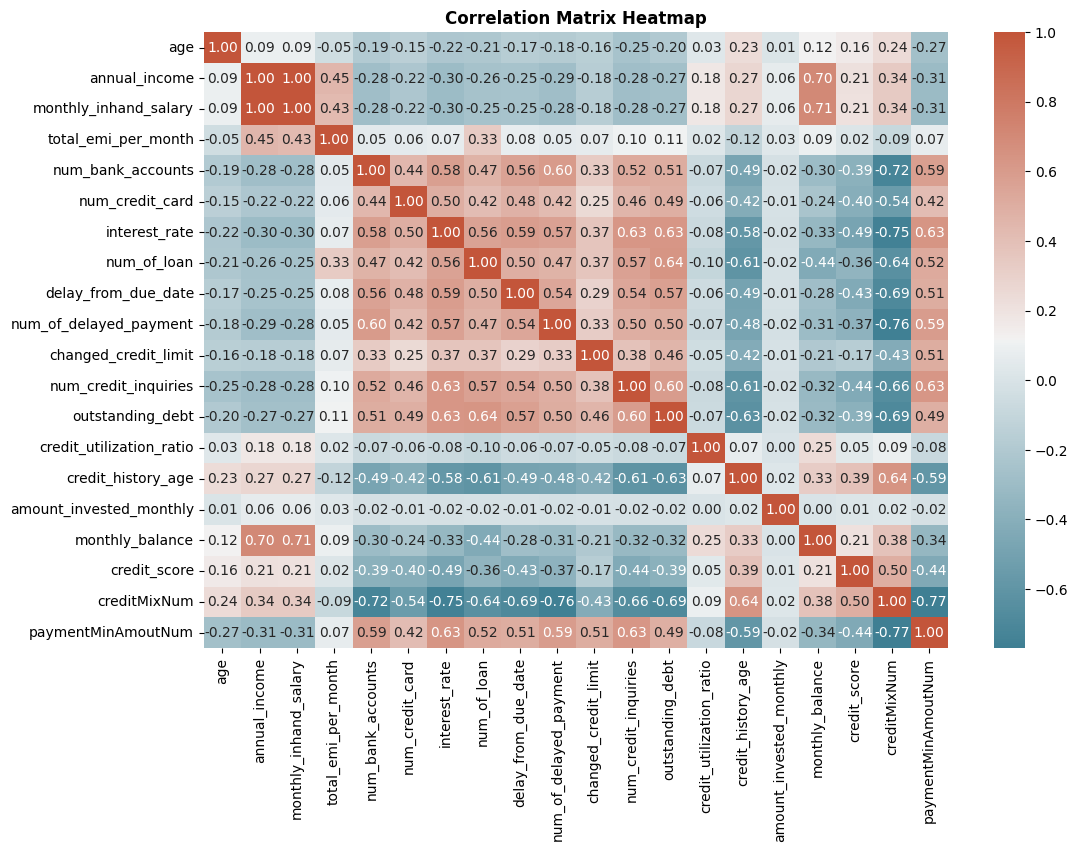

In [35]:
correlationMatrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), fmt='.2f', cbar=True, 
            xticklabels=correlationMatrix.columns, yticklabels=correlationMatrix.columns)

plt.title('Correlation Matrix Heatmap', fontsize=12, fontweight="bold")
plt.show()

In [36]:
correlationWithCreditScore = correlationMatrix['credit_score'].sort_values(key=lambda x: x.abs(), ascending=False)

correlationTable = correlationWithCreditScore.reset_index()
correlationTable.columns = ['Column', 'Correlation with Credit Score']
correlationTableDF = pd.DataFrame(correlationTable)
correlationTableDF

,Column,Correlation with Credit Score
0,credit_score,1.000
1,creditMixNum,0.499
2,interest_rate,-0.485
3,paymentMinAmoutNum,-0.444
4,num_credit_inquiries,-0.436
5,delay_from_due_date,-0.432
6,num_credit_card,-0.404
7,credit_history_age,0.389
8,num_bank_accounts,-0.388
9,outstanding_debt,-0.387


Anova test to check which numerical variables have significant effect size when grouped according to credit score

In [37]:
anovaResults = {}

for column in numericColumns:
    groupData = []
    for score in data['credit_score'].unique():
        groupData.append(data[data['credit_score'] == score][column].tolist())
        
    f_stat, p_value = f_oneway(*groupData)
    anovaResults[column] = {'F-statistic': f_stat, 'p-value': p_value}

anova_results_df = pd.DataFrame(anovaResults).T
anova_results_df.sort_values('p-value', ascending=True, inplace=True)

anova_results_df

,F-statistic,p-value
age,1333.795,0.000
credit_history_age,8903.725,0.000
outstanding_debt,9115.497,0.000
num_credit_inquiries,11918.590,0.000
changed_credit_limit,2681.954,0.000
num_of_delayed_payment,8818.424,0.000
num_of_loan,7440.631,0.000
delay_from_due_date,11471.889,0.000
num_credit_card,9778.638,0.000
num_bank_accounts,9271.533,0.000


Chi Square test to check which categorical variables are associated or independent to the credit score

In [38]:
chiSquareResults = {}

for col in categoricalColumns:
    contingencyTable = pd.crosstab(data['credit_score'], data[col])
    chi2, p, _, _ = chi2_contingency(contingencyTable)
    chiSquareResults[col] = {'chi2': chi2, 'p-value': p}

chiSquareResultsDF = pd.DataFrame(chiSquareResults).T
chiSquareResultsDF.sort_values('p-value', ascending=True, inplace=True)
chiSquareResultsDF


,chi2,p-value
credit_mix,40489.418,0.000
payment_of_min_amount,22420.444,0.000
payment_behaviour,1475.218,0.000
month,201.805,0.000
occupation,180.686,0.000


Using Cramers V to find the level of asociation between categorical columns and credit score. 
1. 0.00 to 0.20: The result is weak. Although the result is statistically significant, the fields are only weakly associated.
2. 0.20 to 0.60: The result is moderate. The fields are moderately associated.
3. 0.60 to 1.00: The result is strong. The fields are strongly associated. [1]

    1. https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v

In [39]:
# function for corrected cramers v taken from https://stackoverflow.com/questions/20892799/using-pandas-calculate-cramérs-coefficient-matrix

def cramersCorrectedStat(confusionMatrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusionMatrix)[0]
    n = confusionMatrix.sum().sum()
    phi2 = chi2/n
    r,k = confusionMatrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cramersVResults = {}

for col in categoricalColumns:
    contingencyTable = pd.crosstab(data['credit_score'], data[col])
    cramersVResults[col] = cramersCorrectedStat(contingencyTable)

contingencyTable = pd.crosstab(loanData['credit_score'], loanData['loan_type'], values=loanData['loan_count'], aggfunc='sum')
cramersVResults['type_of_loan'] = cramersCorrectedStat(contingencyTable)

sortedResults = sorted(cramersVResults.items(), key=lambda x: x[1], reverse=True)

print("Cramér's V Correlations with Credit Score:")
for col, value in sortedResults:
    print(f"{col}: {value:.3f}")

Cramér's V Correlations with Credit Score:
payment_of_min_amount: 0.473
credit_mix: 0.450
type_of_loan: 0.089
payment_behaviour: 0.086
month: 0.031
occupation: 0.028


Out of all the categorical columns, payment_of_min_amount and credit_mix have a fair association with credit score.

After examing the data and looking at how FICO uses features to rank credit scores [2], I will examine the relationship of two categories with credit score. They are debt management and payment behaviour. According to this paper [3], demographic factors also have a high correlation with credit score hence I will also examine how a customer's demographic influences their credit score as well which is a non-financial feature.

2. https://www.clevelandfed.org/publications/economic-commentary/2010/ec-201016-your-credit-score-is-a-ranking-not-a-score
3. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2042711

Customer Segmentation based on debt management using K Mean Clustering

Using Elbow method with inertia to find ideal number of clusters. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

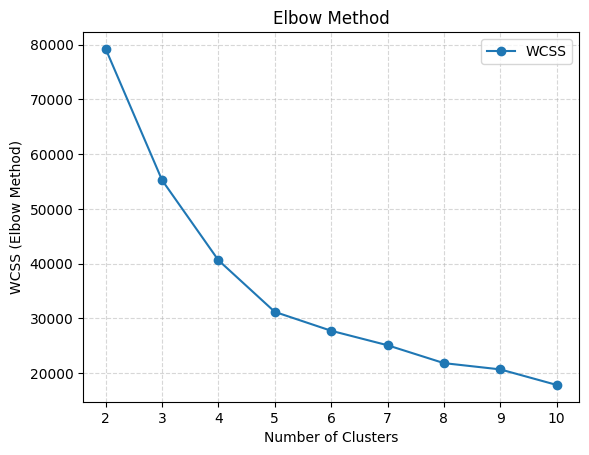

In [40]:
features = ['outstanding_debt', 'num_of_loan']
dataScaled = StandardScaler().fit_transform(data[features])

clusterRange = range(2, 11)  
wcss = []  

for k in clusterRange:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(dataScaled)
    wcss.append(kmeans.inertia_)  

plt.plot(clusterRange, wcss, marker='o', label='WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Elbow Method)')
plt.tick_params(axis='y')

plt.title('Elbow Method')
fig.tight_layout()
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

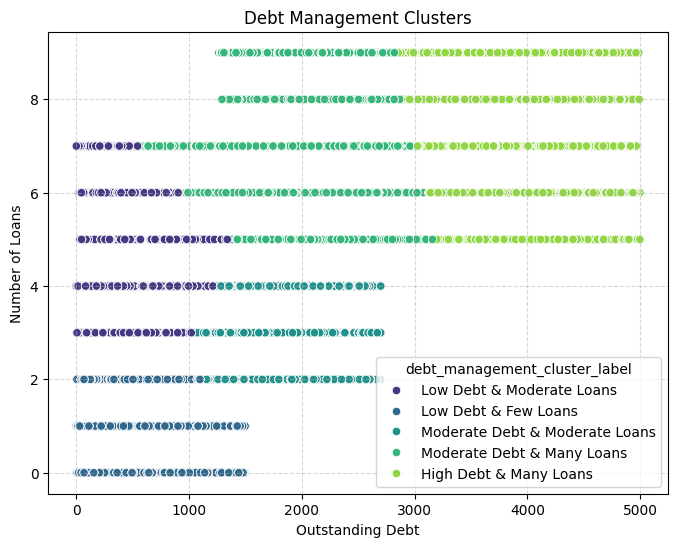

In [41]:
dataClusters = data.copy()
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
dataClusters['debt_management_cluster'] = kmeans.fit_predict(dataScaled)

labels = {0: 'Moderate Debt & Many Loans', 
                 1: 'Low Debt & Few Loans', 
                 2: 'Moderate Debt & Moderate Loans', 
                 3: 'High Debt & Many Loans', 
                 4: 'Low Debt & Moderate Loans'}

dataClusters['debt_management_cluster_label'] = dataClusters['debt_management_cluster'].map(labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['outstanding_debt'], y=dataClusters['num_of_loan'], hue=dataClusters['debt_management_cluster_label'], palette='viridis')
plt.title('Debt Management Clusters')
plt.xlabel('Outstanding Debt')
plt.ylabel('Number of Loans')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()


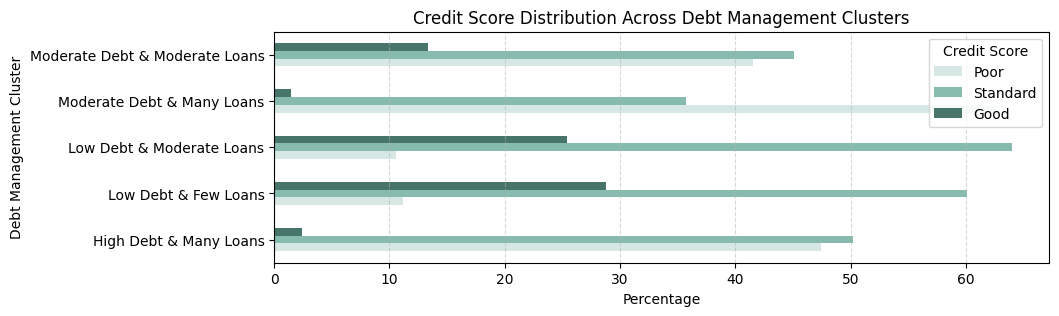

In [42]:
clusterScoreDistribution = pd.crosstab(dataClusters['debt_management_cluster_label'], dataClusters['credit_score'], normalize='index') * 100

clusterScoreDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across Debt Management Clusters')
plt.xlabel('Percentage')
plt.ylabel('Debt Management Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.show()

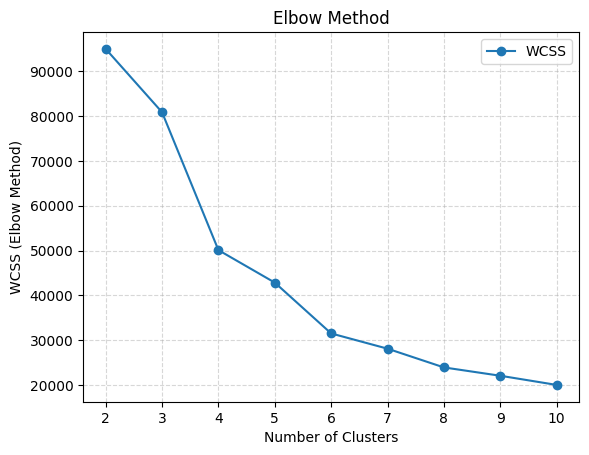

In [43]:
features = ['outstanding_debt', 'num_credit_card']
dataScaled = StandardScaler().fit_transform(data[features])

clusterRange = range(2, 11)  
wcss = []  

for k in clusterRange:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(dataScaled)
    wcss.append(kmeans.inertia_)  

plt.plot(clusterRange, wcss, marker='o', label='WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Elbow Method)')
plt.tick_params(axis='y')

plt.title('Elbow Method')
fig.tight_layout()
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

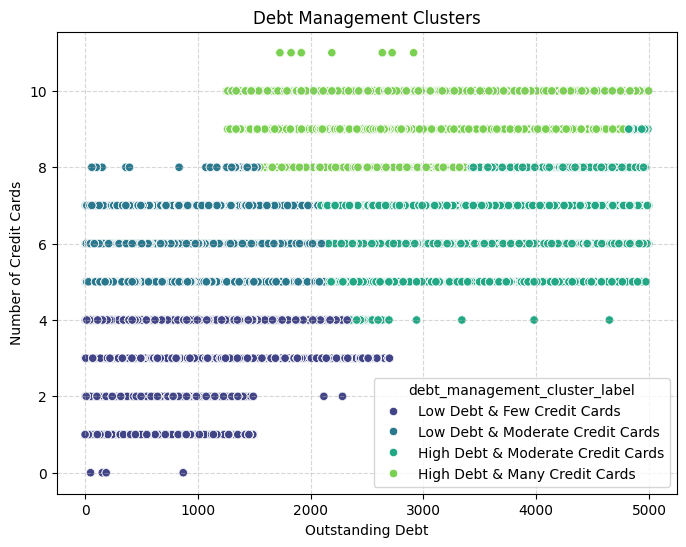

In [44]:
dataClusters = data.copy()
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
dataClusters['debt_management_cluster'] = kmeans.fit_predict(dataScaled)

labels = {0: 'High Debt & Many Credit Cards', 
                 1: 'Low Debt & Moderate Credit Cards', 
                 2: 'High Debt & Moderate Credit Cards', 
                 3: 'Low Debt & Few Credit Cards'}

dataClusters['debt_management_cluster_label'] = dataClusters['debt_management_cluster'].map(labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['outstanding_debt'], y=dataClusters['num_credit_card'], hue=dataClusters['debt_management_cluster_label'], palette='viridis')
plt.title('Debt Management Clusters')
plt.xlabel('Outstanding Debt')
plt.ylabel('Number of Credit Cards')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()


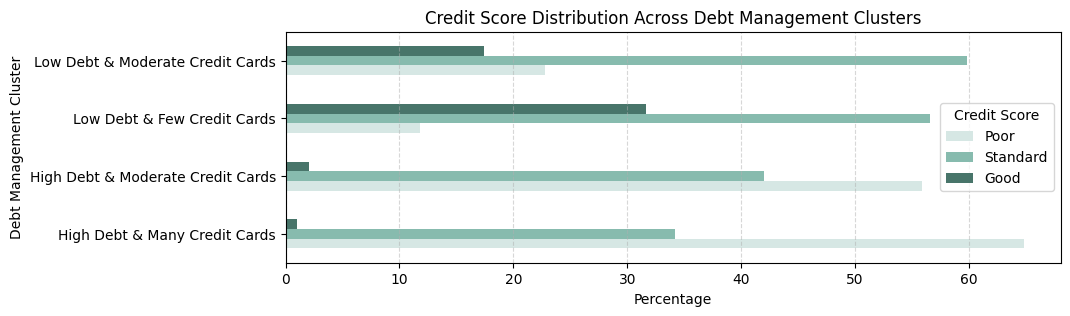

In [45]:
clusterScoreDistribution = pd.crosstab(dataClusters['debt_management_cluster_label'], dataClusters['credit_score'], normalize='index') * 100

clusterScoreDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across Debt Management Clusters')
plt.xlabel('Percentage')
plt.ylabel('Debt Management Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.show()

Balancing the dataset by undersampling

minClassSize = scoreCounts.min()

balanced_classes = []
for score in scoreCounts.index:
    classGroup = data[data['credit_score'] == score]
    resampledClassGroup = resample(classGroup, replace=False, n_samples=minClassSize, random_state=42)
    balanced_classes.append(resampledClassGroup)

balancedData = pd.concat(balanced_classes)
balancedData = balancedData.reset_index(drop=True)

data = balancedData.copy()
scoreCounts = data['credit_score'].value_counts()
print(scoreCounts.sort_index())

plt.figure(figsize=(6, 6))
plt.pie(scoreCounts.sort_index(), labels=['0 (Poor)', '1 (Standard)', '(2) Good'], autopct='%1.1f%%', startangle=90, colors=['#d6e7e4', '#87bbae', '#48756a'])
plt.title("Distribution of Credit Scores", fontsize=12, fontweight="bold")
plt.axis('equal')
plt.show()

data.describe().T

data.describe(include="object").T